In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%cd '/home/naodell/work/wbr/analysis'
np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {'legend.fontsize': 20,
          'axes.labelsize': 20,
          'figure.figsize': (8, 8),
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'xtick.labelsize':18,
          'ytick.labelsize':18,
         }
matplotlib.rcParams.update(params)
%matplotlib inline
%connect_info

/home/naodell/work/wbr/analysis
{
  "shell_port": 55255,
  "iopub_port": 41617,
  "stdin_port": 59401,
  "control_port": 41103,
  "hb_port": 58467,
  "ip": "127.0.0.1",
  "key": "2c12facc-ad83a3d413e7b097dca5670b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-b3ace087-b900-4e63-8efe-d530b874997b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
# get the data
pull_data  = pd.read_csv('local_data/pulls.csv', index_col=0)
param_data = pd.read_csv('data/model_parameters_partial.csv').set_index('name')
jes_mask = np.array([True if 'jes' in pname else False for pname in pull_data.index])
btag_mask = np.array([True if ('btag' in pname or 'ctag' in pname or 'mistag' in pname) else False for pname in pull_data.index])
tau_mask = np.array([True if ('eff_tau' in pname or 'misid_tau' in pname or 'escale_tau' in pname) else False for pname in pull_data.index])

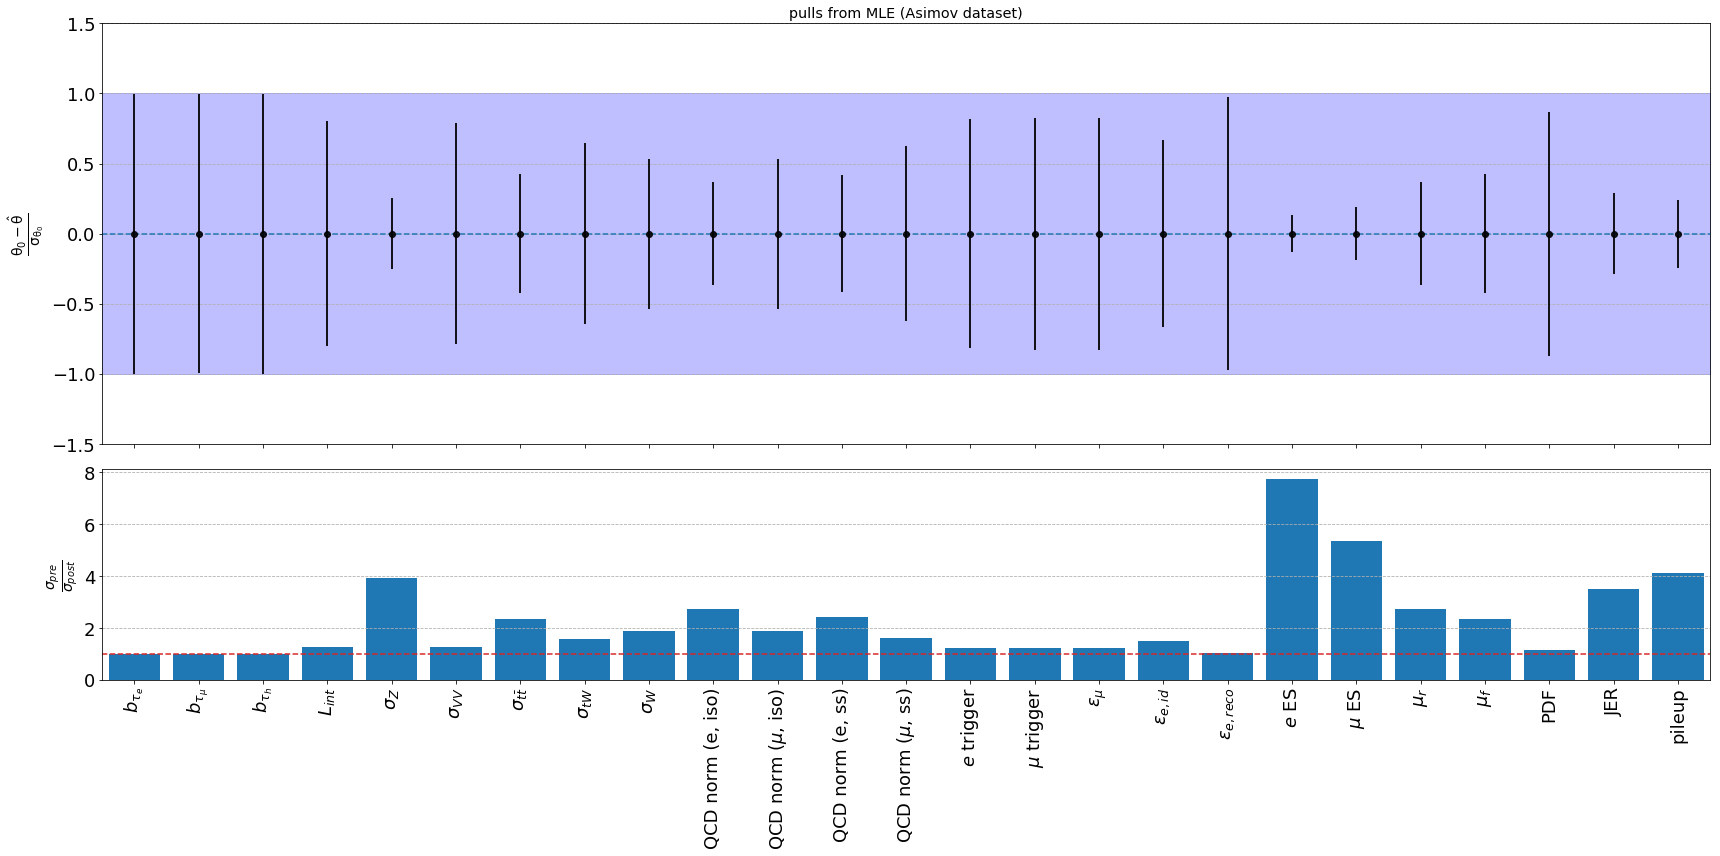

In [3]:
# pulls for all non-JES systematics
fig, axes = plt.subplots(2, 1, figsize=(24, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
constraints = pull_data.iloc[~jes_mask&~btag_mask&~tau_mask]['constraint']
params_pre  = pull_data.iloc[~jes_mask&~btag_mask&~tau_mask]['params_init']
stderr_pre  = pull_data.iloc[~jes_mask&~btag_mask&~tau_mask]['stderr_pre (%)']
params_post = pull_data.iloc[~jes_mask&~btag_mask&~tau_mask]['params_init']
stderr_post = pull_data.iloc[~jes_mask&~btag_mask&~tau_mask]['stderr_post (%)']

pulls = (params_pre - params_post)/stderr_post
p_labels = param_data.loc[pull_data[~jes_mask&~btag_mask&~tau_mask].index].label

# plot pulls
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{0} - \hat{\theta}}{\sigma_{\theta_{0}}}$')
ax.set_title('pulls from MLE (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{pre}}{\sigma_{post}}$')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_main.pdf')
plt.show()

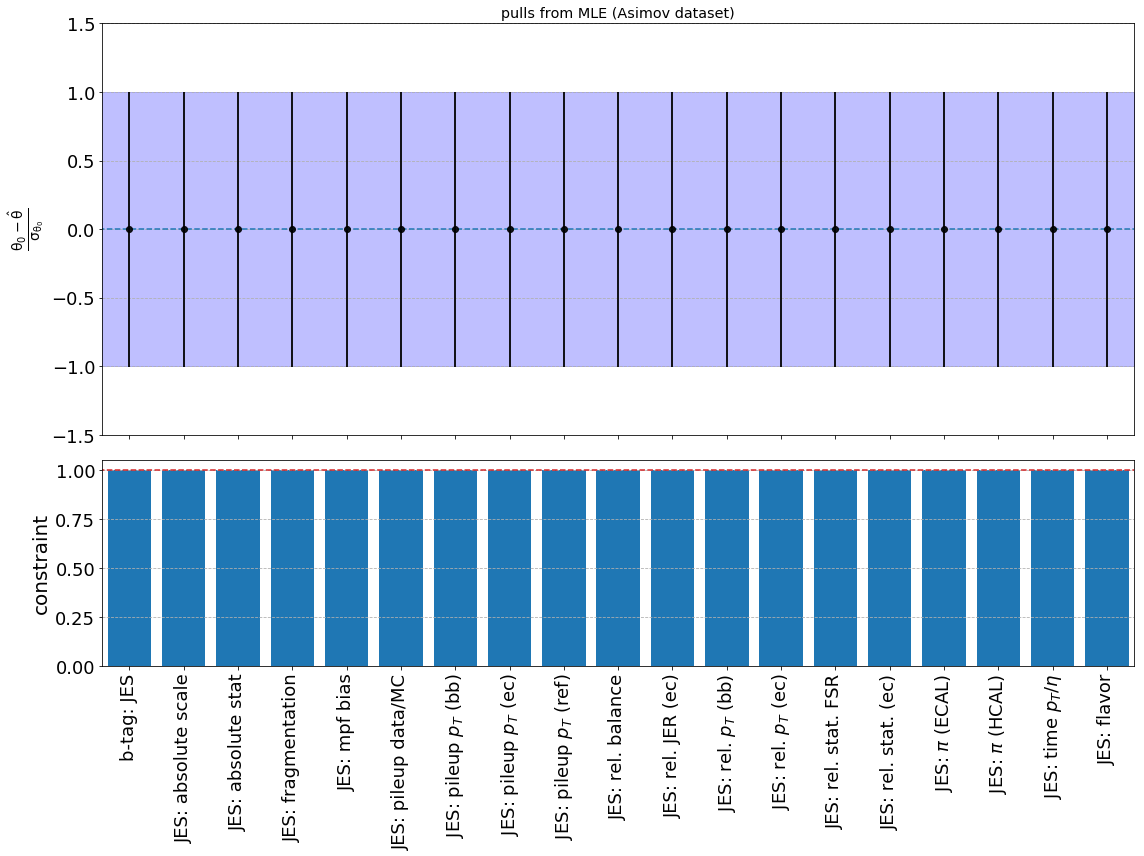

In [4]:
# make the plot
fig, axes = plt.subplots(2, 1, figsize=(16, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
constraints = pull_data.iloc[jes_mask]['constraint']
params_pre  = pull_data.iloc[jes_mask]['params_init']
stderr_pre  = pull_data.iloc[jes_mask]['stderr_pre (%)']
params_post = pull_data.iloc[jes_mask]['params_init']
stderr_post = pull_data.iloc[jes_mask]['stderr_post (%)']

pulls = (params_pre - params_post)/stderr_post
p_labels = param_data.loc[pull_data[jes_mask].index].label

nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{0} - \hat{\theta}}{\sigma_{\theta_{0}}}$')
ax.set_title('pulls from MLE (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel('constraint')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_jes.pdf')
plt.show()

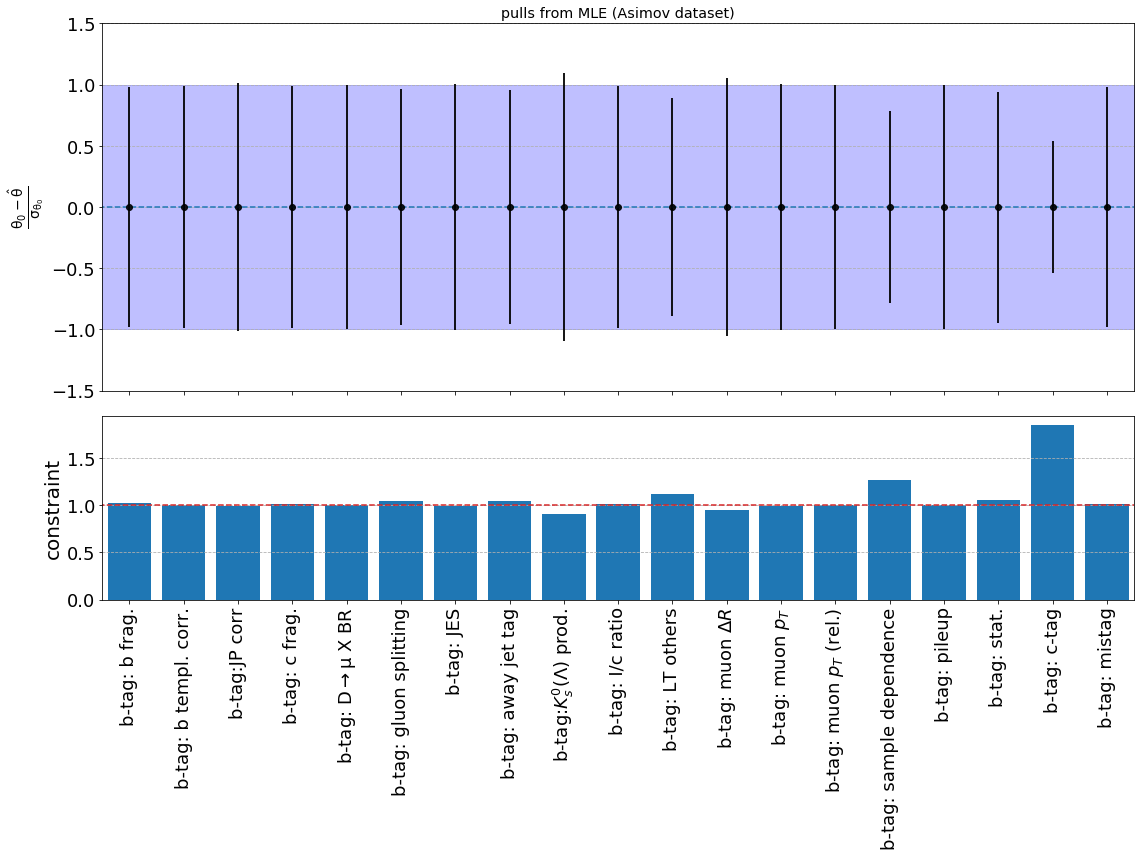

In [5]:
# make the plot
fig, axes = plt.subplots(2, 1, figsize=(16, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
constraints = pull_data.iloc[btag_mask]['constraint']
params_pre  = pull_data.iloc[btag_mask]['params_init']
stderr_pre  = pull_data.iloc[btag_mask]['stderr_pre (%)']
params_post = pull_data.iloc[btag_mask]['params_init']
stderr_post = pull_data.iloc[btag_mask]['stderr_post (%)']

pulls = (params_pre - params_post)/stderr_post
p_labels = param_data.loc[pull_data[btag_mask].index].label

nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{0} - \hat{\theta}}{\sigma_{\theta_{0}}}$')
ax.set_title('pulls from MLE (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel('constraint')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_btag.pdf')
plt.show()

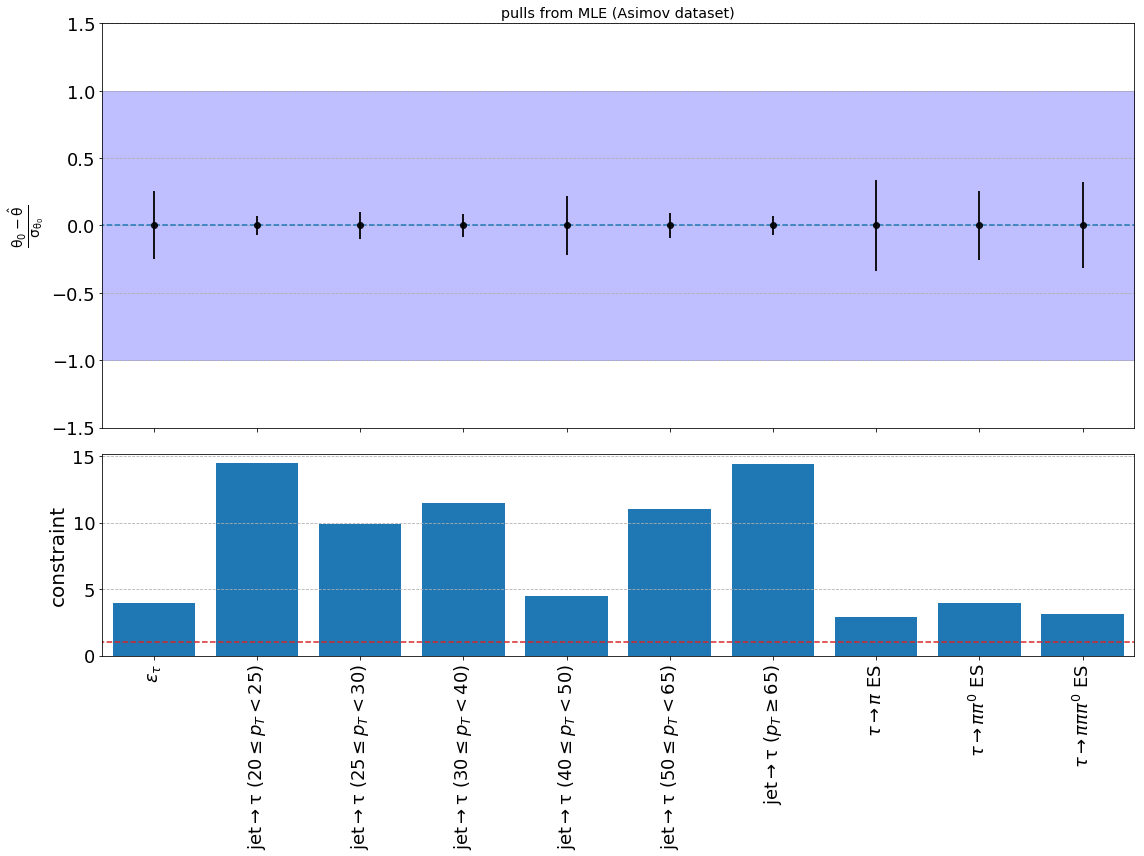

In [6]:
# make the plot
fig, axes = plt.subplots(2, 1, figsize=(16, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
constraints = pull_data.iloc[tau_mask]['constraint']
params_pre  = pull_data.iloc[tau_mask]['params_init']
stderr_pre  = pull_data.iloc[tau_mask]['stderr_pre (%)']
params_post = pull_data.iloc[tau_mask]['params_init']
stderr_post = pull_data.iloc[tau_mask]['stderr_post (%)']

pulls = (params_pre - params_post)/stderr_post
p_labels = param_data.loc[pull_data[tau_mask].index].label

nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{0} - \hat{\theta}}{\sigma_{\theta_{0}}}$')
ax.set_title('pulls from MLE (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel('constraint')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_tau.pdf')
plt.show()